In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#create file and read in csv 
file_path = "mxmh_survey_results (1).csv"
mental_health_data_df = pd.read_csv(file_path)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
mental_health_data_df['Primary streaming service'].fillna(value='N/A', inplace=True)
mental_health_data_df['BPM'].fillna(value='-1', inplace=True)
mental_health_data_df['Music effects'].fillna(value='N/A', inplace=True)
mental_health_data_df['While working'].fillna(value='N/A', inplace=True)
del mental_health_data_df['Instrumentalist']
del mental_health_data_df['Foreign languages']
del mental_health_data_df['Composer']

In [4]:
mental_health_data_df = mental_health_data_df.dropna(how='any')
mental_health_data_df.head()
mental_health_data_df_40_under = mental_health_data_df[mental_health_data_df['Age'] < 41].copy()

In [5]:
age_bins = [10, 20, 30, 40]
age_labels = ['10 to 20', '21 to 30', '31 to 40']
mental_health_data_df_40_under['Age group'] = pd.cut(mental_health_data_df_40_under['Age'], age_bins, labels=age_labels)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age group
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,I understand.,10 to 20
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10 to 20
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10 to 20
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.,10 to 20
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.,10 to 20


In [6]:
mental_health_data_df_40_under.set_index('Age group', inplace=True)
mental_health_data_df_40_under.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
Age group,,,,,,,,,,,,,,,,,,,,,
10 to 20,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,I understand.
10 to 20,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
10 to 20,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
10 to 20,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
10 to 20,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [7]:
generation_groups = mental_health_data_df_40_under.groupby('Age group')
mean_by_generation = generation_groups.mean()
del mean_by_generation['Age']
del mean_by_generation['Hours per day']
mean_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
10 to 20,5.868343,4.520710,3.640533,2.689349
21 to 30,6.271255,5.574899,3.724696,2.894737
31 to 40,5.723684,5.000000,4.328947,2.605263


In [8]:
median_by_generation = generation_groups.median()
del median_by_generation['Age']
del median_by_generation['Hours per day']
median_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
10 to 20,6.5,5.0,3.0,2.0
21 to 30,7.0,6.0,3.0,2.0
31 to 40,6.0,6.0,4.0,1.0


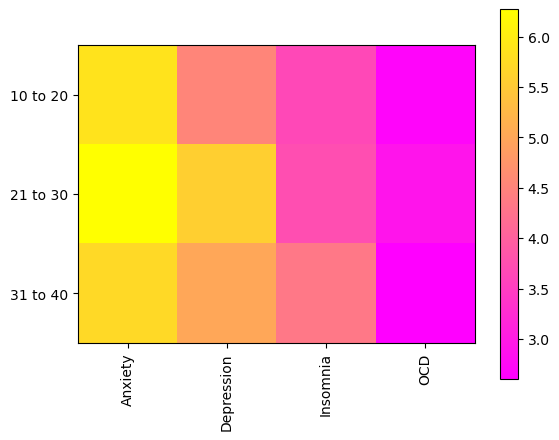

In [9]:
mental_illness_labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, ax = plt.subplots()
#create heat map
mean_im = ax.imshow(mean_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(mean_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)

# display plot
plt.show()

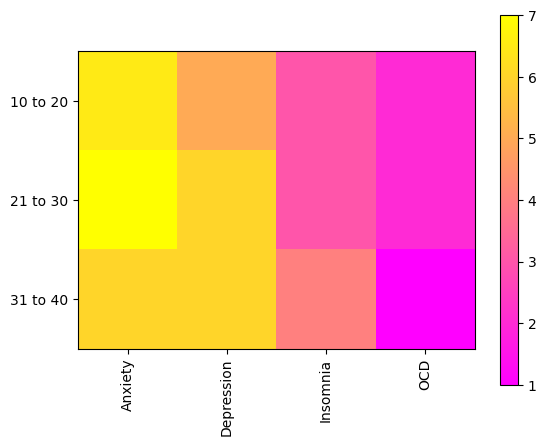

In [10]:

fig, ax = plt.subplots()
#create heat map
median_im = ax.imshow(median_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(median_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)
# display plot
plt.show()

Text(0.5, 1.0, 'Total persons by Age')

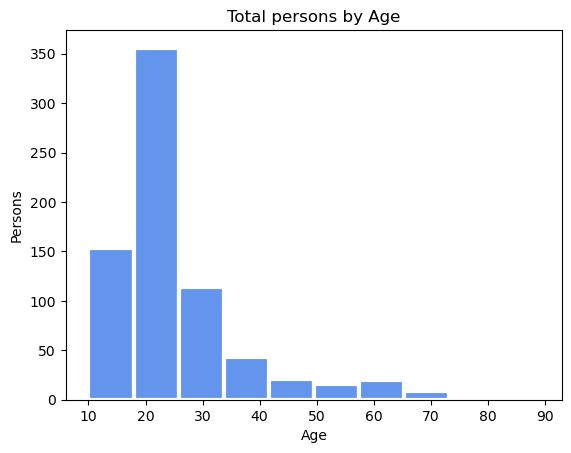

In [11]:
mental_health_data_df.hist(["Age"], edgecolor='white', linewidth=3, grid = False, color = "cornflowerblue")
plt.xlabel('Age')
plt.ylabel('Persons')
plt.title('Total persons by Age')



More between 18-35 y.o.

Text(0, 0.5, 'N. of Person')

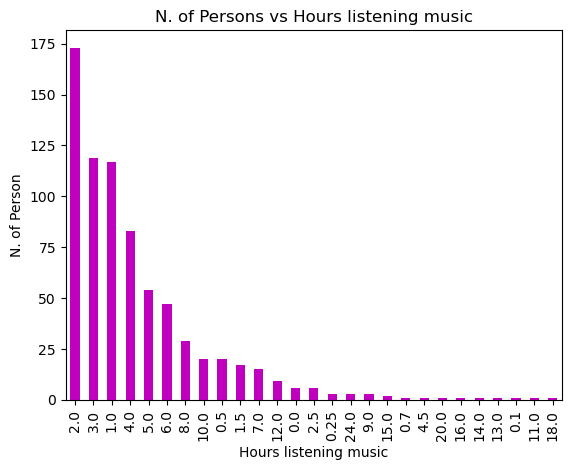

In [12]:

services = mental_health_data_df['Hours per day'].value_counts()
services.plot(kind='bar', color = "m")

plt.title('N. of Persons vs Hours listening music')
plt.xlabel("Hours listening music")
plt.ylabel("N. of Person")

Usually 2 the max and between 3 and 6 hours

Text(0.5, 1.0, 'Age distribution by genre')

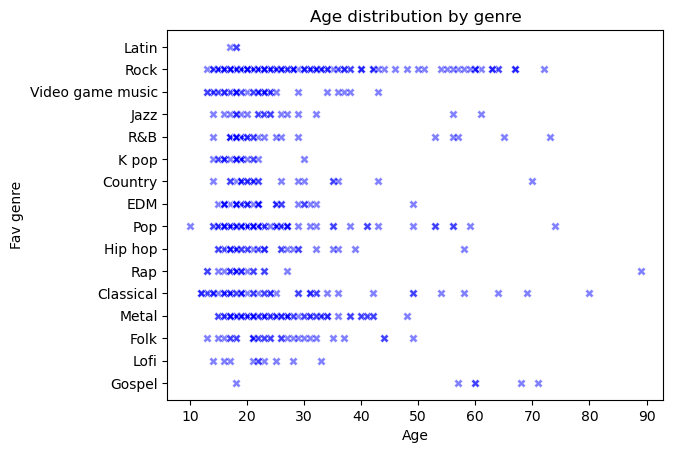

In [13]:
sns.scatterplot(data=mental_health_data_df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "blue")
plt.title('Age distribution by genre')

# **********EXTRA SEABORN

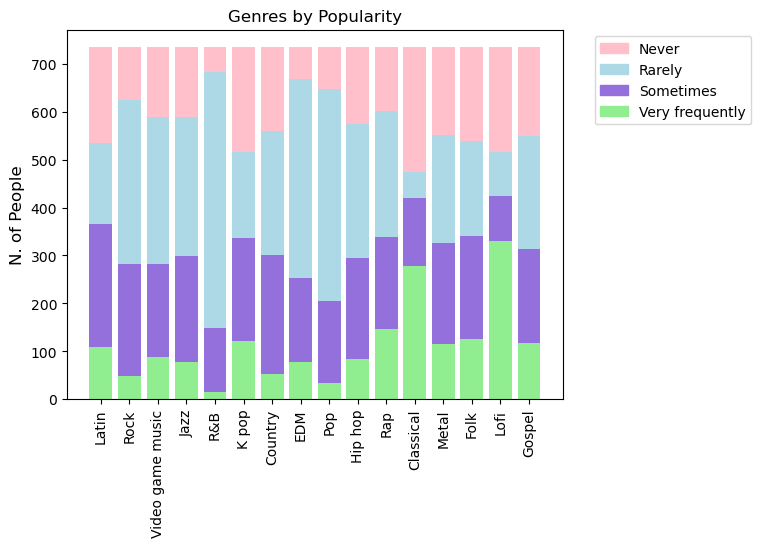

In [50]:
genre_all = mental_health_data_df['Fav genre'].unique()


i = 8

rarely_dist = []
sometimes_dist = []
never_dist = []
veryf_dist = []

while i != 27:
    freq_dist = mental_health_data_df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    rarely_dist.append(freq_dist[0])
    sometimes_dist.append(freq_dist[1])
    never_dist.append(freq_dist[2])
    veryf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    
    ax.bar(i, veryf_dist[i], label='Very frequently', color = "lightgreen") 
    
    ax.bar(i, sometimes_dist[i], label='Sometimes', bottom = veryf_dist[i], color = "mediumpurple")
        
    ax.bar(i, rarely_dist[i], label='Rarely', bottom = veryf_dist[i] + sometimes_dist[i], color = "lightblue")
    
    ax.bar(i, never_dist[i], label='Never', bottom=veryf_dist[i] + sometimes_dist[i] + rarely_dist[i], color = "pink")
    


    
ax.set_title('Genres by Popularity')
ax.set_ylabel('N. of People', fontsize =12)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(genre_all)
plt.xticks(rotation = 90)

patch1 = mpatches.Patch(color='pink', label='Never')
patch2 = mpatches.Patch(color='lightblue', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='lightgreen', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [15]:
fillna_mode = lambda col: col.fillna(col.mode()[0])

mental_health_data_df_genre = mental_health_data_df.apply(fillna_mode)

In [16]:
mental_health_data_df_genre = mental_health_data_df.astype({
    'Age': 'int8',
    'Hours per day': 'float16',
    'While working': bool,
    'Exploratory': bool,
    'BPM': 'int16',
    'Frequency [Classical]': 'category',
    'Frequency [Country]': 'category',
    'Frequency [EDM]': 'category',
     'Frequency [Folk]': 'category',
     'Frequency [Gospel]': 'category',
     'Frequency [Hip hop]': 'category',
     'Frequency [Jazz]': 'category',
     'Frequency [K pop]': 'category',
     'Frequency [Latin]': 'category',
     'Frequency [Lofi]': 'category',
     'Frequency [Metal]': 'category',
     'Frequency [Pop]': 'category',
     'Frequency [R&B]': 'category',
     'Frequency [Rap]': 'category',
     'Frequency [Rock]': 'category',
     'Frequency [Video game music]': 'category',
     'Anxiety': 'int8',
     'Depression': 'int8',
     'Insomnia': 'int8',
     'OCD': 'int8',
     'Music effects': 'category'})

mental_health_data_df_genre

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18,Spotify,3.0,True,Latin,True,156,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,N/A,I understand.
1,8/27/2022 19:57:31,63,Pandora,1.5,True,Rock,True,119,Sometimes,Never,...,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,N/A,I understand.
2,8/27/2022 21:28:18,18,Spotify,4.0,True,Video game music,True,132,Never,Never,...,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
3,8/27/2022 21:40:40,61,YouTube Music,2.5,True,Jazz,True,84,Sometimes,Never,...,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
4,8/27/2022 21:54:47,18,Spotify,4.0,True,R&B,True,107,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17,Spotify,2.0,True,Rock,True,120,Very frequently,Rarely,...,Never,Rarely,Very frequently,Never,7,6,0,9,Improve,I understand.
732,11/1/2022 22:26:42,18,Spotify,1.0,True,Pop,True,160,Rarely,Rarely,...,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve,I understand.
733,11/3/2022 23:24:38,19,Other streaming service,6.0,True,Rap,True,120,Rarely,Sometimes,...,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve,I understand.
734,11/4/2022 17:31:47,19,Spotify,5.0,True,Classical,True,170,Very frequently,Never,...,Never,Never,Never,Sometimes,2,3,2,1,Improve,I understand.


In [17]:
# Carrying out the division of age brackets:
mental_health_data_df_genre['Age'] = pd.cut(mental_health_data_df_genre['Age'], bins=[9, 19, 59, 70],
                                 labels=['Teenager', 'Adults', 'Seniors'])

In [18]:
mental_health_data_df_genre['Age'].value_counts()

Adults      409
Teenager    299
Seniors      21
Name: Age, dtype: int64

Text(0, 0.5, '')

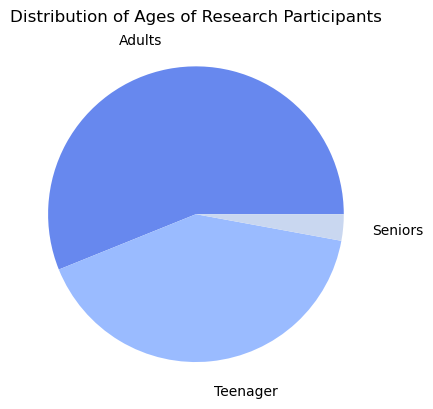

In [19]:
genre = mental_health_data_df_genre["Age"].value_counts()

genre.plot(kind='pie', labeldistance = 1.2, colors = sns.color_palette("coolwarm"))

plt.title('Distribution of Ages of Research Participants')
plt.ylabel("")

In [20]:
streaming_ages = ( mental_health_data_df_genre
    .groupby('Age')['Primary streaming service']
    .agg(['value_counts'])
    .reset_index()
    .rename(columns={'value_counts':'quantity'}))

streaming_ages.sample(10)


,Age,Primary streaming service,quantity
1,Teenager,YouTube Music,31
5,Teenager,Pandora,1
13,Seniors,Pandora,5
15,Seniors,I do not use a streaming service.,3
12,Adults,N/A,1
2,Teenager,Apple Music,22
4,Teenager,I do not use a streaming service.,15
3,Teenager,Other streaming service,18
0,Teenager,Spotify,212
6,Adults,Spotify,240


Text(0, 0.5, '')

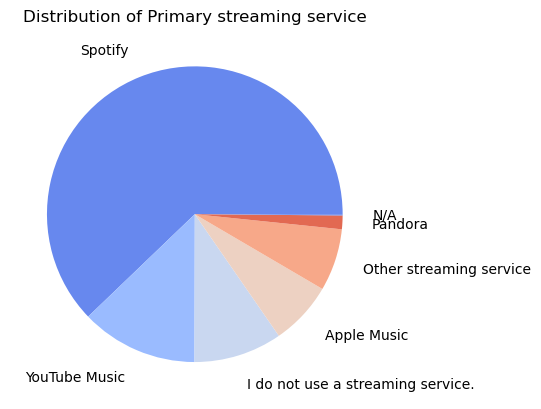

In [21]:
genre = mental_health_data_df_genre["Primary streaming service"].value_counts()

genre.plot(kind='pie', labeldistance = 1.2, colors = sns.color_palette("coolwarm"))

plt.title('Distribution of Primary streaming service')
plt.ylabel("")

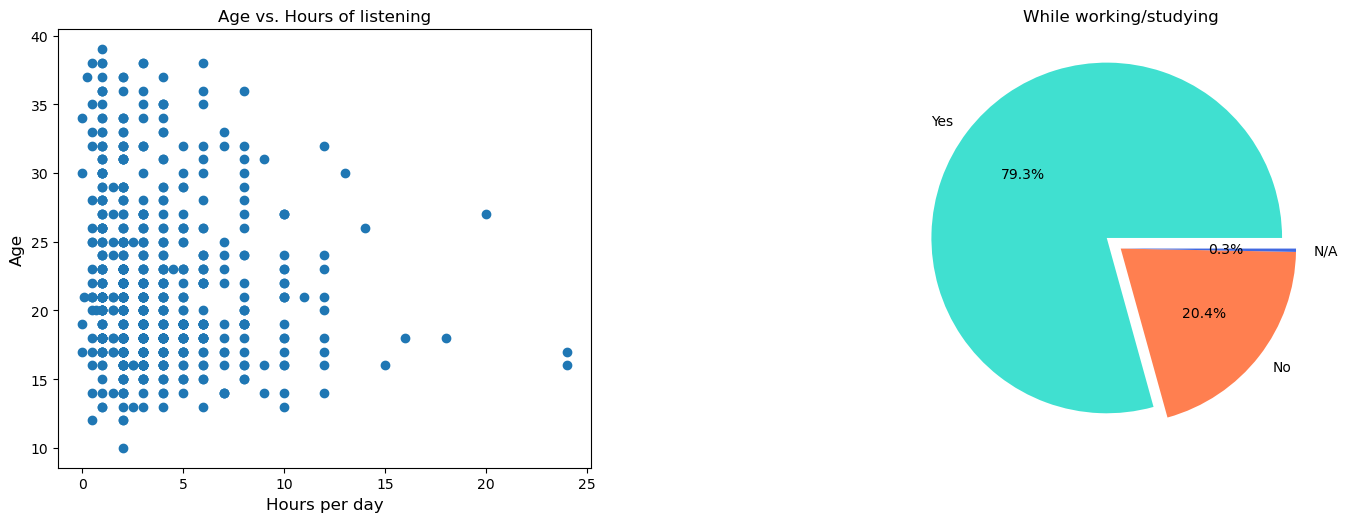

In [22]:
Reduced_mental_health_data_df= pd.DataFrame(mental_health_data_df.loc[mental_health_data_df["Age"]<40,:])

x = Reduced_mental_health_data_df["Hours per day"]
y = Reduced_mental_health_data_df["Age"]
z= Reduced_mental_health_data_df["While working"].value_counts()

fig,(ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(w_pad =5)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.scatter(x,y)
ax1.set_xlabel('Hours per day', fontsize =12)
ax1.set_ylabel('Age', fontsize =12)
ax1.set_title('Age vs. Hours of listening', fontsize =12)

labels=Reduced_mental_health_data_df["While working"].unique()
ax2.pie(z, labels = labels, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('While working/studying')
plt.show()

ROCK VS MENTAL HEALTH

In [23]:
# Creating the dataset and viewing a sample:
rock_metal_data = (
    mental_health_data_df
    .query('`Fav genre` == "Metal" | `Fav genre` == "Rock"')
)

rock_metal_data.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
634,9/12/2022 19:03:41,20.0,YouTube Music,4.0,Yes,Metal,Yes,180.0,Rarely,Sometimes,...,Never,Never,Very frequently,Sometimes,5.0,2.0,1.0,6.0,Improve,I understand.
104,8/28/2022 16:04:58,20.0,Spotify,3.0,Yes,Rock,Yes,170.0,Never,Never,...,Sometimes,Rarely,Very frequently,Sometimes,6.0,7.0,0.0,0.0,Improve,I understand.
470,9/1/2022 16:35:30,63.0,Spotify,2.0,Yes,Rock,Yes,133.0,Very frequently,Sometimes,...,Rarely,Never,Very frequently,Never,5.0,4.0,6.0,2.0,Improve,I understand.
103,8/28/2022 15:41:56,28.0,YouTube Music,1.0,No,Rock,Yes,120.0,Rarely,Never,...,Never,Never,Sometimes,Rarely,6.0,6.0,2.0,0.0,No effect,I understand.
54,8/28/2022 12:54:35,22.0,Spotify,4.0,Yes,Rock,Yes,126.0,Rarely,Never,...,Sometimes,Rarely,Very frequently,Rarely,8.0,7.0,4.0,3.0,Improve,I understand.
509,9/2/2022 3:36:18,25.0,YouTube Music,5.0,No,Metal,No,-1,Rarely,Rarely,...,Never,Never,Sometimes,Rarely,8.0,2.0,1.0,0.0,Improve,I understand.
358,8/29/2022 10:45:36,25.0,YouTube Music,2.0,Yes,Metal,Yes,-1,Rarely,Rarely,...,Rarely,Rarely,Very frequently,Sometimes,9.0,9.0,7.0,3.0,Improve,I understand.
445,8/31/2022 23:09:44,21.0,Spotify,4.0,Yes,Metal,Yes,155.0,Never,Never,...,Never,Never,Very frequently,Very frequently,10.0,6.0,8.0,0.0,Improve,I understand.
218,8/28/2022 21:55:05,20.0,Spotify,3.0,Yes,Rock,Yes,120.0,Sometimes,Rarely,...,Rarely,Rarely,Very frequently,Sometimes,8.0,5.0,2.0,3.0,Improve,I understand.
615,9/12/2022 12:14:25,33.0,Spotify,2.0,Yes,Metal,Yes,134.0,Rarely,Never,...,Sometimes,Sometimes,Very frequently,Sometimes,4.0,8.0,0.0,0.0,Improve,I understand.


In [24]:
genre_ages = (rock_metal_data.groupby('Age')['Fav genre'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages

,Age,Fav genre,quantity
0,13.0,Rock,1
1,14.0,Rock,3
2,15.0,Rock,6
3,15.0,Metal,2
4,16.0,Rock,12
...,...,...,...
67,61.0,Rock,1
68,63.0,Rock,3
69,64.0,Rock,2
70,67.0,Rock,3


In [25]:
# Checking the average age of listeners:
rock_mean_age = (
    rock_metal_data
    .groupby('Fav genre', as_index=False)[['Age']]
    .mean()
    .round()
)
rock_mean_age

,Fav genre,Age
0,Metal,25.0
1,Rock,28.0


In [26]:
# Grouping data to get mental conditions averages:
rock_means = (
       rock_metal_data
       .groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round(2))

rock_means

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Metal,5.76,5.07,4.56,2.40
Rock,6.12,5.24,3.88,2.68


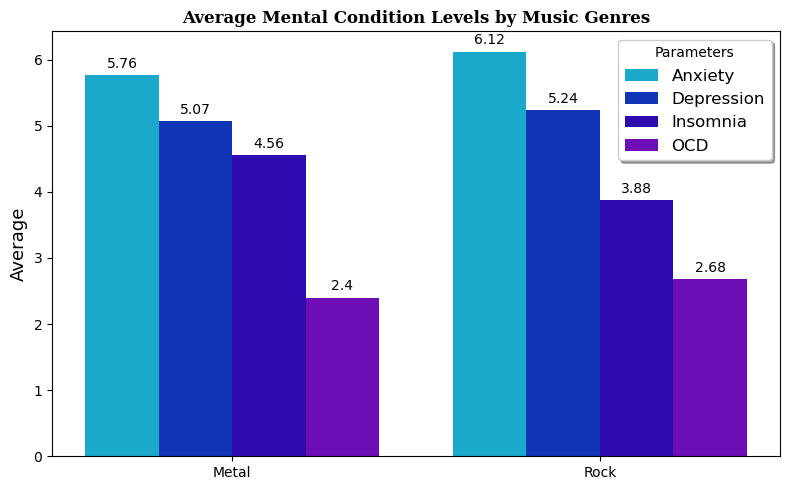

In [27]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:
labels = ['Metal', 'Rock']
anx_mean = rock_means["Anxiety"]
dep_mean = rock_means["Depression"]
ins_mean = rock_means["Insomnia"]
ocd_mean = rock_means["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels by Music Genres', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Metal', 'Rock'])
plt.legend(
    fontsize=12, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.show()

CLASSICAL MUSIC VS MENTAL HEALTH

In [28]:
# Creating the dataset and viewing a sample:
classical_data = (
    mental_health_data_df
    .query('`Fav genre` == "Classical"')
)

classical_data.sample(10)


,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
415,8/30/2022 8:00:32,69.0,Pandora,4.0,Yes,Classical,Yes,72.0,Very frequently,Sometimes,...,Sometimes,Never,Very frequently,Never,1.0,1.0,2.0,0.0,Improve,I understand.
551,9/3/2022 17:14:57,34.0,Spotify,3.0,Yes,Classical,No,95.0,Very frequently,Never,...,Never,Never,Sometimes,Sometimes,0.0,0.0,0.0,0.0,No effect,I understand.
101,8/28/2022 15:22:00,25.0,I do not use a streaming service.,0.5,No,Classical,No,140.0,Very frequently,Never,...,Rarely,Never,Very frequently,Sometimes,1.0,1.0,3.0,1.0,Improve,I understand.
385,8/29/2022 18:00:27,16.0,Other streaming service,3.0,Yes,Classical,No,72.0,Very frequently,Rarely,...,Never,Never,Never,Rarely,9.0,7.0,10.0,6.0,No effect,I understand.
527,9/2/2022 14:09:04,80.0,I do not use a streaming service.,3.0,Yes,Classical,No,122.0,Very frequently,Rarely,...,Never,Never,Never,Sometimes,7.0,3.0,9.0,2.0,Improve,I understand.
474,9/1/2022 16:58:12,58.0,YouTube Music,1.0,Yes,Classical,Yes,80.0,Sometimes,Rarely,...,Never,Never,Never,Never,0.0,0.0,2.0,1.0,Improve,I understand.
514,9/2/2022 5:40:14,64.0,YouTube Music,2.0,Yes,Classical,No,-1,Very frequently,Never,...,Rarely,Never,Rarely,Never,5.0,2.0,4.0,0.0,Improve,I understand.
259,8/29/2022 0:21:31,32.0,Apple Music,0.5,No,Classical,Yes,-1,Very frequently,Never,...,Never,Never,Very frequently,Rarely,3.0,0.0,4.0,4.0,No effect,I understand.
686,9/23/2022 23:06:29,18.0,I do not use a streaming service.,1.0,Yes,Classical,No,120.0,Sometimes,Sometimes,...,Rarely,Rarely,Rarely,Rarely,2.0,0.0,0.0,5.0,No effect,I understand.
393,8/29/2022 19:08:34,13.0,Other streaming service,4.0,Yes,Classical,Yes,126.0,Very frequently,Never,...,Never,Never,Sometimes,Sometimes,8.0,5.0,10.0,3.0,Improve,I understand.


In [29]:
genre_ages_classical = (classical_data.groupby('Age')['Fav genre'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages_classical

,Age,Fav genre,quantity
0,12.0,Classical,3
1,13.0,Classical,2
2,14.0,Classical,4
3,15.0,Classical,1
4,16.0,Classical,4
5,17.0,Classical,5
6,18.0,Classical,2
7,19.0,Classical,5
8,20.0,Classical,1
9,21.0,Classical,2


In [30]:
mean_age_classical = (
    classical_data
    .groupby('Fav genre', as_index=False)[['Age']]
    .mean()
    .round()
)
mean_age_classical

,Fav genre,Age
0,Classical,26.0


In [31]:
# Grouping data to get mental conditions averages:
classical_means = (
       classical_data
       .groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round()
)

classical_means

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Classical,5.0,4.0,4.0,2.0


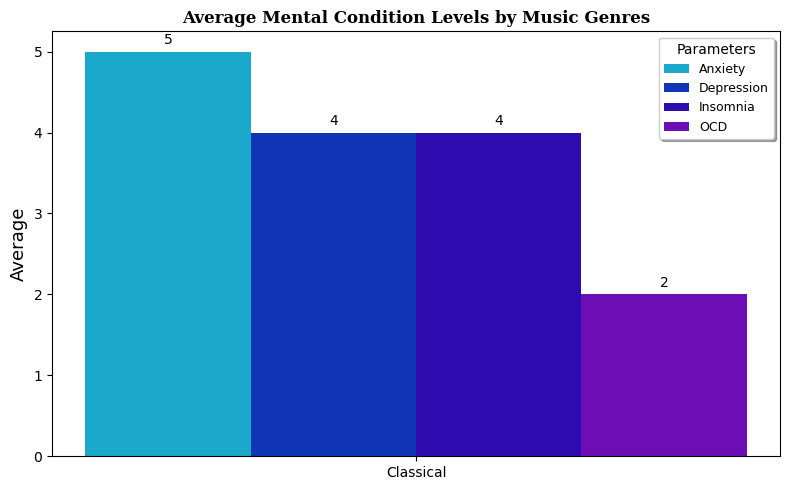

In [32]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:
labels = ['Clasical']
anx_mean = classical_means["Anxiety"]
dep_mean = classical_means["Depression"]
ins_mean = classical_means["Insomnia"]
ocd_mean = classical_means["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels by Music Genres', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Classical'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.show()

ROCK AND CLASSICAL VS MENTAL HEALTH

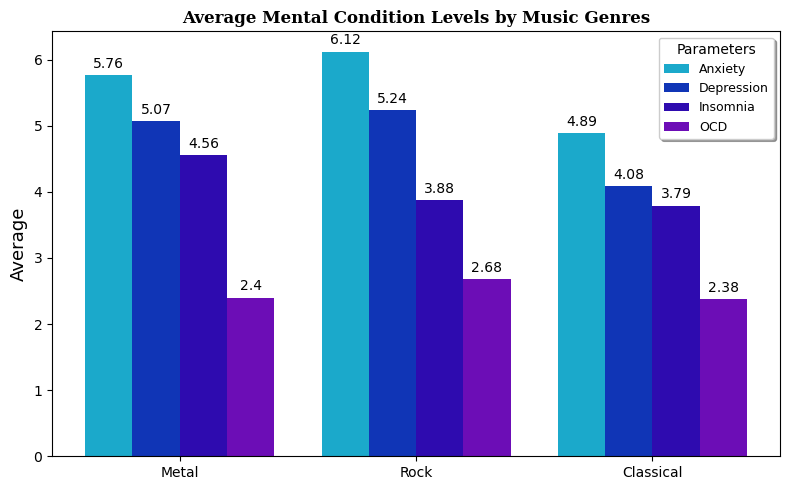

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:
labels = ['Metal', 'Rock', 'Classical']
anx_mean = [5.76, 6.12, 4.89]
dep_mean = [5.07, 5.24, 4.08]
ins_mean = [4.56, 3.88, 3.79]
ocd_mean = [2.40, 2.68, 2.38]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels by Music Genres', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Metal', 'Rock', 'Classical'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.show()

CONCLUSIONS

HOURS WORKING, CLASSICAL MUSIC VS MENTAL HEALTH

In [34]:
# Creating the dataset and viewing a sample:
working_data_yes = (
    mental_health_data_df
    .query('`While working` == "Yes"')
)

working_data_yes.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
701,10/3/2022 10:25:46,30.0,YouTube Music,1.0,Yes,Rock,Yes,115.0,Sometimes,Rarely,...,Rarely,Rarely,Very frequently,Sometimes,9.0,7.0,8.0,4.0,Improve,I understand.
85,8/28/2022 14:26:12,37.0,Spotify,1.0,Yes,Rock,No,115.0,Rarely,Rarely,...,Rarely,Rarely,Very frequently,Never,9.0,10.0,6.0,10.0,No effect,I understand.
432,8/31/2022 6:36:13,16.0,Spotify,2.0,Yes,Classical,No,155.0,Very frequently,Rarely,...,Never,Never,Rarely,Rarely,7.0,5.0,3.0,1.0,Improve,I understand.
696,9/28/2022 19:37:41,20.0,Spotify,5.0,Yes,R&B,Yes,128.0,Very frequently,Sometimes,...,Very frequently,Very frequently,Very frequently,Sometimes,10.0,6.0,3.0,8.0,Improve,I understand.
554,9/3/2022 18:37:51,22.0,I do not use a streaming service.,2.0,Yes,Video game music,No,-1,Sometimes,Rarely,...,Never,Never,Never,Very frequently,4.0,6.0,0.0,2.0,Improve,I understand.
186,8/28/2022 20:04:49,19.0,Spotify,1.0,Yes,Pop,Yes,94.0,Rarely,Sometimes,...,Sometimes,Sometimes,Very frequently,Never,7.0,5.0,1.0,2.0,Improve,I understand.
685,9/23/2022 23:06:12,18.0,Spotify,2.0,Yes,Rap,Yes,-1,Rarely,Never,...,Rarely,Very frequently,Never,Rarely,5.0,8.0,7.0,4.0,Improve,I understand.
558,9/3/2022 21:52:02,17.0,Spotify,2.0,Yes,R&B,Yes,-1,Very frequently,Rarely,...,Very frequently,Rarely,Sometimes,Never,3.0,3.0,1.0,0.0,Improve,I understand.
271,8/29/2022 1:06:46,19.0,Other streaming service,5.0,Yes,EDM,Yes,97.0,Rarely,Never,...,Never,Very frequently,Sometimes,Rarely,0.0,1.0,3.0,5.0,Improve,I understand.
674,9/18/2022 20:32:27,17.0,Spotify,5.0,Yes,Rock,Yes,110.0,Very frequently,Rarely,...,Very frequently,Very frequently,Very frequently,Sometimes,7.0,3.0,9.0,7.0,Improve,I understand.


In [35]:
genre_ages_working = (working_data_yes.groupby('Age')['While working'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages_working.sample(12)

,Age,While working,quantity
3,14.0,Yes,16
27,38.0,Yes,4
11,22.0,Yes,30
6,17.0,Yes,52
24,35.0,Yes,4
8,19.0,Yes,54
19,30.0,Yes,6
57,89.0,Yes,1
39,55.0,Yes,1
28,39.0,Yes,1


In [36]:
mean_age_working = (working_data_yes.groupby('Fav genre', as_index=False)[['Age']]
                    .mean()
                    .round())

mean_age_working

,Fav genre,Age
0,Classical,26.0
1,Country,24.0
2,EDM,22.0
3,Folk,25.0
4,Gospel,55.0
5,Hip hop,24.0
6,Jazz,24.0
7,K pop,18.0
8,Latin,18.0
9,Lofi,22.0


In [37]:
# Grouping data to get mental conditions averages:
working_means_yes = (
       working_data_yes
       .groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round()
)

working_means_yes 

,Anxiety,Depression,Insomnia,OCD
While working,,,,
Yes,6.0,5.0,4.0,3.0


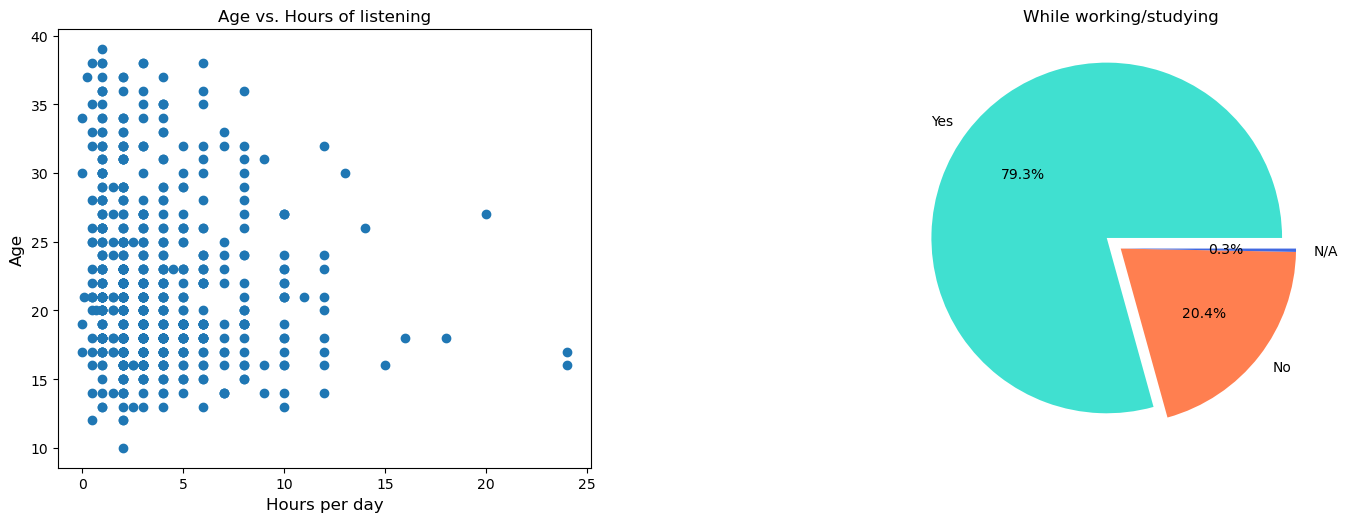

In [38]:
x = Reduced_mental_health_data_df["Hours per day"]
y = Reduced_mental_health_data_df["Age"]
z= Reduced_mental_health_data_df["While working"].value_counts()

fig,(ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(w_pad =5)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.scatter(x,y)
ax1.set_xlabel('Hours per day', fontsize =12)
ax1.set_ylabel('Age', fontsize =12)
ax1.set_title('Age vs. Hours of listening', fontsize =12)

labels=Reduced_mental_health_data_df["While working"].unique()
ax2.pie(z, labels = labels, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('While working/studying')
plt.show()

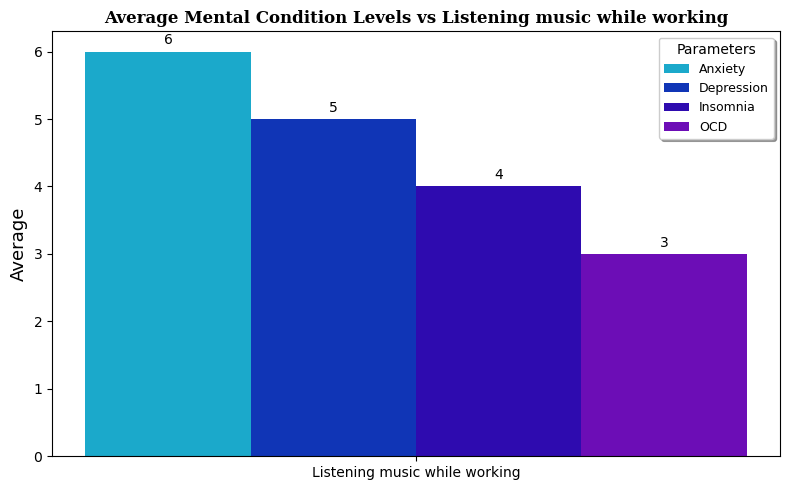

In [45]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:

labels = ['While working` == "Yes"']
anx_mean = working_means_yes["Anxiety"]
dep_mean = working_means_yes["Depression"]
ins_mean = working_means_yes["Insomnia"]
ocd_mean = working_means_yes["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels vs Listening music while working', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Listening music while working'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.show()

In [46]:
# Creating the dataset and viewing a sample:
working_data_no = (
    mental_health_data_df
    .query('`While working` == "No"')
)

working_data_no.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
461,9/1/2022 15:24:02,34.0,I do not use a streaming service.,2.0,No,Video game music,No,100.0,Rarely,Rarely,...,Never,Sometimes,Rarely,Very frequently,8.0,10.0,10.0,0.0,No effect,I understand.
103,8/28/2022 15:41:56,28.0,YouTube Music,1.0,No,Rock,Yes,120.0,Rarely,Never,...,Never,Never,Sometimes,Rarely,6.0,6.0,2.0,0.0,No effect,I understand.
293,8/29/2022 2:54:06,18.0,Spotify,1.0,No,Rock,Yes,108.0,Sometimes,Rarely,...,Rarely,Rarely,Very frequently,Rarely,8.0,9.0,6.0,1.0,Improve,I understand.
207,8/28/2022 21:24:10,17.0,Spotify,2.0,No,R&B,No,148.0,Sometimes,Never,...,Very frequently,Sometimes,Never,Rarely,8.0,6.0,10.0,3.0,Improve,I understand.
153,8/28/2022 18:51:10,25.0,Spotify,2.0,No,Pop,No,120.0,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Rarely,7.0,7.0,5.0,0.0,Improve,I understand.
312,8/29/2022 4:41:30,32.0,Spotify,2.0,No,Rock,Yes,158.0,Never,Rarely,...,Sometimes,Sometimes,Sometimes,Never,4.0,7.0,0.0,0.0,Improve,I understand.
211,8/28/2022 21:30:41,20.0,Spotify,3.0,No,Rock,Yes,136.0,Never,Very frequently,...,Never,Sometimes,Very frequently,Rarely,10.0,10.0,7.0,3.0,Improve,I understand.
350,8/29/2022 9:47:26,18.0,YouTube Music,0.5,No,Rock,Yes,66.0,Rarely,Never,...,Rarely,Never,Very frequently,Never,5.0,3.0,1.0,0.0,No effect,I understand.
581,9/6/2022 10:12:09,26.0,Spotify,8.0,No,Rock,No,172.0,Never,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,8.0,10.0,7.0,3.0,No effect,I understand.
119,8/28/2022 16:37:00,28.0,Spotify,0.5,No,Folk,Yes,130.0,Rarely,Sometimes,...,Never,Rarely,Very frequently,Rarely,4.0,7.0,1.0,0.0,Improve,I understand.


In [47]:
# Grouping data to get mental conditions averages:
working_means_no = (
       working_data_no
       .groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round(2)
)

working_means_no

,Anxiety,Depression,Insomnia,OCD
While working,,,,
No,5.62,4.47,3.52,2.18


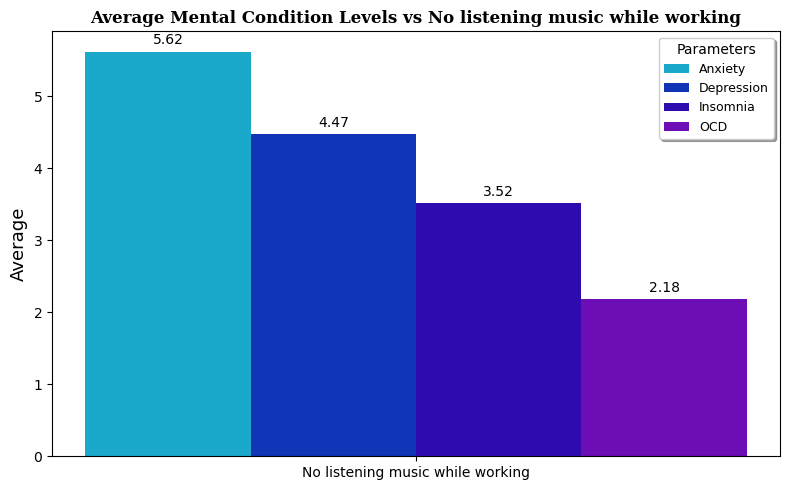

In [48]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:

labels = ['While working` == "No"']
anx_mean = working_means_no["Anxiety"]
dep_mean = working_means_no["Depression"]
ins_mean = working_means_no["Insomnia"]
ocd_mean = working_means_no["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels vs No listening music while working', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['No listening music while working'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.show()